In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import the data
df = pd.read_csv('medical_examination.csv', index_col=[0])
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
#Calculate BMI and add 'overweight' column
df['overweight'] = round(df['weight']/((df.height / 100))**2).astype(int)

In [4]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23


In [5]:
#Understand the data types and null count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   sex          70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
 12  overweight   70000 non-null  int32  
dtypes: float64(1), int32(1), int64(11)
memory usage: 7.2 MB


In [6]:
#Assign BMI over 25 as overweight
df.loc[df['overweight'] > 25,'overweight'] = 1

In [7]:
#Assign BMI under 25 as not overweight
df.loc[df['overweight'] <= 25,'overweight'] = 0

In [8]:
df['overweight'].value_counts()

0    70000
Name: overweight, dtype: int64

In [9]:
#Normalise the data by classifying 0 as always good and 1 as always bad
df.loc[df['cholesterol'] == 1,'cholesterol'] = 0
df.loc[df['cholesterol'] > 1,'cholesterol'] = 1
df.loc[df['gluc'] == 1,'gluc'] = 0
df.loc[df['gluc'] > 1,'gluc'] = 1

In [10]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature 
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'])['value'].count().to_frame()
    df_cat.rename(columns={'value': 'total'}, inplace=True)
    df_cat.reset_index(inplace=True)
    
    # Draw the catplot with 'sns.catplot()'
    catplot = sns.catplot(x='variable', y='total', hue='value', col='cardio', kind='bar', data=df_cat)  

    # Get the figure for the output
    fig = catplot.fig

    # Save the figure
    fig.savefig('catplot.png')
    #return fig

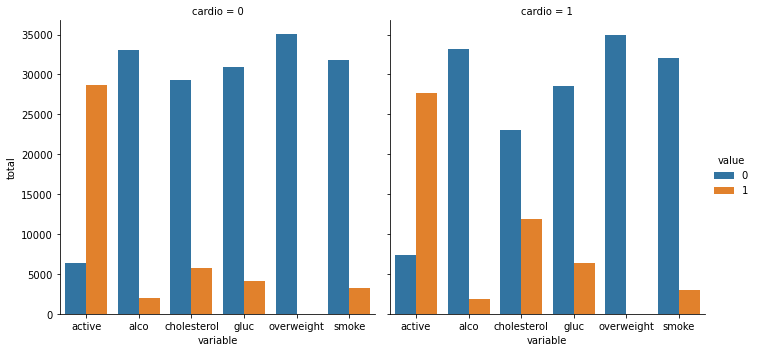

In [11]:
# Call and visualise cat plot function
draw_cat_plot()

In [12]:
# Draw Heat Map showing correlation between variables
def draw_heat_map():
    # Clean the data and filter out patient percentiles that represent incorrect data
    df_heat = df[ 
        ( df['ap_lo'] <= df['ap_hi'] ) & 
        ( df['height'] >= df['height'].quantile(0.025) ) & 
        ( df['height'] <= df['height'].quantile(0.975) ) & 
        ( df['weight'] >= df['weight'].quantile(0.025) ) & 
        ( df['weight'] <= df['weight'].quantile(0.975) ) 
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 9))

    # Draw the heatmap with 'sns.heatmap()'
    ax = sns.heatmap(corr, mask=mask, annot=True, fmt='0.1f', square=True)

    # Save the figure
    fig.savefig('heatmap.png')
    #return fig


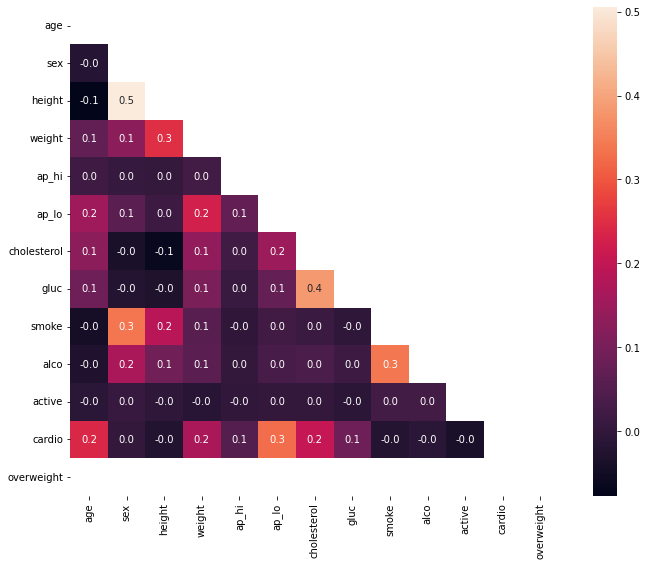

In [13]:
draw_heat_map()